# Working with Data & a Real Cost Function
### Mean Square Error: A cost function for regression problems
#### Residual Sum of Squares $$RSS = \sum_{i=1}^{n} \big(y^{(i} - h_\theta x^{(i)} \big)^2 $$
#### Mean Square Error $$MSE = \frac{1}{n}\sum_{i=1}^{n} \big(y^{(i} - h_\theta x^{(i)} \big)^2 $$
##### Why we use MSE instead of RSS, they are similar what?
###### Because when our dataset get larger, number will get large as well if we don't divide by the number of samples, thus causing overflow when value gets too large

In [68]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm 

# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]).transpose()

print("Shape of x_5 array {}", x_5.shape)
print("Shape of x_5 array {P}",y_5.shape)

regression = LinearRegression()
regression.fit(x_5, y_5)
print('Theta 1:', regression.intercept_)
print('Theta 2:', regression.coef_[0])

Shape of x_5 array {} (7, 1)
Shape of x_5 array {P} (7, 1)
Theta 1: [0.84753515]
Theta 2: [1.22272646]


Text(0, 0.5, 'y values')

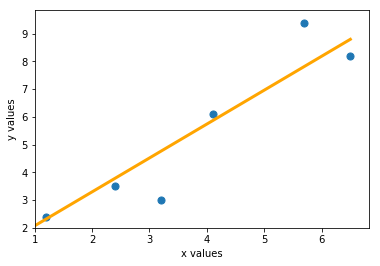

In [69]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regression.predict(x_5), color="orange", linewidth=3)
plt.xlim(1)
plt.ylim(2)
plt.xlabel("x values")
plt.ylabel("y values")

In [70]:
# y_hat = theta0 + theta1*x
y_hat = 0.8475351486029536 + 1.2227264637835915 * x_5
print("Estimate values are {}".format(y_hat))
print("Actual values are {}".format(y_5))

Estimate values are [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Actual values are [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [96]:
# Defining MSE function
def mse(y,y_hat):
    mse_calc = np.average((y- y_hat)**2, axis=0)
    return mse_calc[0]

In [72]:
print("Manually calculated MSE is ", mse(y_5, y_hat))
print("MSE using sklearn.metrcis library", mean_squared_error(y_5, y_hat))

Manually calculated MSE is  0.9479655759794577
MSE using sklearn.metrcis library 0.9479655759794577


 ## 3D plot for MSE function
 
 ### Make data for thetas
     

In [77]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas) 

plot_0, plot_1 = np.meshgrid(th_0, th_1)


# Calc MSE using nested for loops

In [78]:
plot_cost = np.zeros((nr_thetas, nr_thetas))
plot_cost 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
#nested loop practice
for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_0[i][j] + plot_1[i][j] * x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        

print("plot_0", plot_0)
print("plot_1", plot_1)
print("plot_cost", plot_cost)

plot_0 [[-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 ...
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]
 [-1.         -0.9798995  -0.95979899 ...  2.95979899  2.9798995
   3.        ]]
plot_1 [[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-0.9798995  -0.9798995  -0.9798995  ... -0.9798995  -0.9798995
  -0.9798995 ]
 [-0.95979899 -0.95979899 -0.95979899 ... -0.95979899 -0.95979899
  -0.95979899]
 ...
 [ 2.95979899  2.95979899  2.95979899 ...  2.95979899  2.95979899
   2.95979899]
 [ 2.9798995   2.9798995   2.9798995  ...  2.9798995   2.9798995
   2.9798995 ]
 [ 3.          3.          3.         ...  3.          3.
   3.        ]]
plot_cost [[108.51285714 1

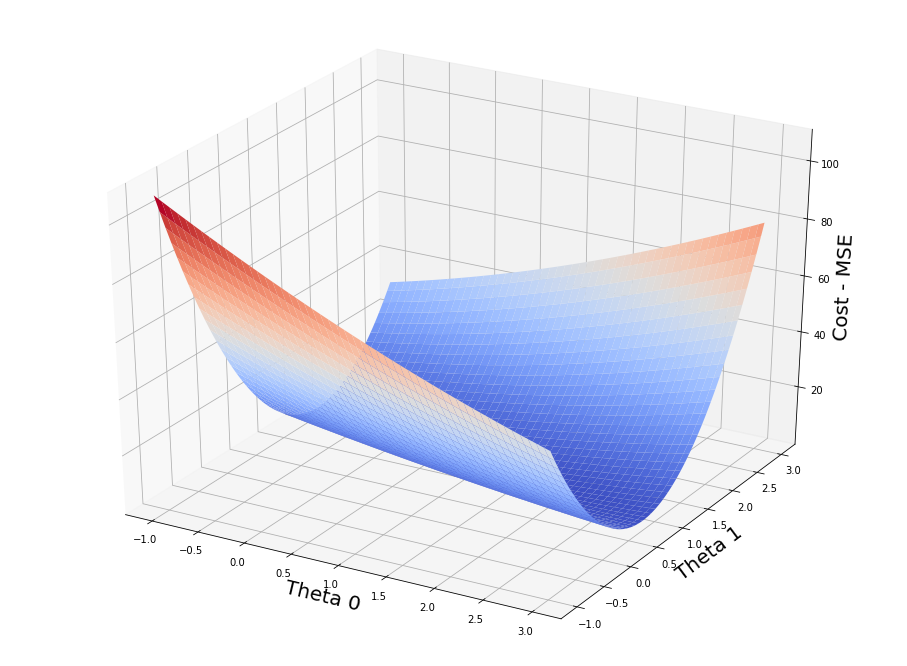

In [84]:
# plotting mse

fig = plt.figure(figsize=[16,12]) # return a figure object
ax = fig.gca(projection='3d') # return a Axes3dSubplot, basically a 3d figure, i.e. setting up the bone of the graph

ax.set_xlabel("Theta 0", fontsize=20)
ax.set_ylabel("Theta 1", fontsize=20)
ax.set_zlabel("Cost - MSE", fontsize=20)

ax.plot_surface(plot_0, plot_1, plot_cost, cmap=cm.coolwarm)
plt.show()

In [90]:
print("Min value of plot_cost", plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)
print('Min occurs at (i,j): ', ij_min)
print('Theta 0 at plot_0[111][91]', plot_0[111][91])
print('Theta 1 at plot_1[111][91]', plot_1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j):  (111, 91)
Theta 0 at plot_0[111][91] 0.829145728643216
Theta 1 at plot_1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} =  - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} =  - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)}\big)$$

# MSE & Gradient Descent


In [93]:
def grad(x,y, thetas):
    n = y.size
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    return np.concatenate((theta0_slope, theta1_slope), axis=0)



In [106]:
multiplier = 0.01
thetas = np.array([2.9,2.9])

# Collect data points for scatter points
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(100):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new value to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
#Results 
print("Min occurs at Theta 0", thetas[0])
print("Min occurs at Theta 1", thetas[1])
print('MSE is', mse(y_5, thetas[0] + thetas[1] * x_5))
plot_vals

Min occurs at Theta 0 1.7645788000874985
Min occurs at Theta 1 1.0239445598353407
MSE is 1.1958944416278219


array([[2.9       , 2.9       ],
       [2.74777143, 2.2416    ],
       [2.64222994, 1.79833515],
       [2.56818141, 1.50011153],
       [2.51538182, 1.29967163],
       [2.47692452, 1.1651543 ],
       [2.44815295, 1.07507868],
       [2.42592753, 1.01496232],
       [2.40813148, 0.97504115],
       [2.39333755, 0.94873219],
       [2.38058341, 0.93159722],
       [2.36922015, 0.92064398],
       [2.3588102 , 0.91385512],
       [2.34905846, 0.90987054],
       [2.33976587, 0.90777327],
       [2.33079816, 0.90694511],
       [2.32206469, 0.9069693 ],
       [2.31350429, 0.90756486],
       [2.30507562, 0.90854237],
       [2.29675072, 0.90977417],
       [2.28851068, 0.91117416],
       [2.28034264, 0.91268436],
       [2.27223785, 0.91426566],
       [2.26419034, 0.91589173],
       [2.25619599, 0.91754483],
       [2.24825196, 0.91921302],
       [2.24035623, 0.92088827],
       [2.23250737, 0.92256516],
       [2.22470433, 0.9242401 ],
       [2.21694633, 0.92591064],
       [2.

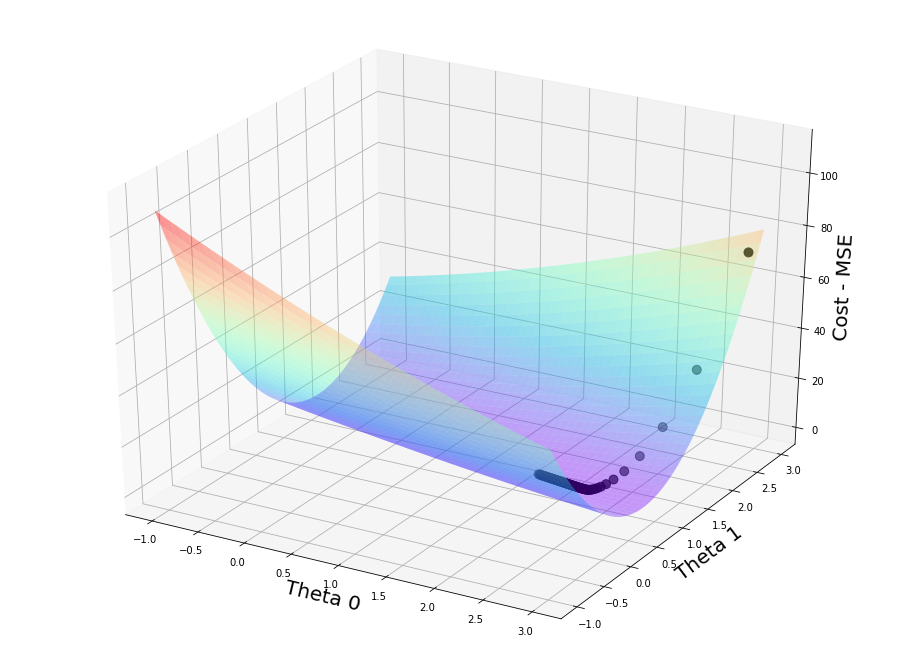

array([2.9       , 2.74777143, 2.64222994, 2.56818141, 2.51538182,
       2.47692452, 2.44815295, 2.42592753, 2.40813148, 2.39333755,
       2.38058341, 2.36922015, 2.3588102 , 2.34905846, 2.33976587,
       2.33079816, 2.32206469, 2.31350429, 2.30507562, 2.29675072,
       2.28851068, 2.28034264, 2.27223785, 2.26419034, 2.25619599,
       2.24825196, 2.24035623, 2.23250737, 2.22470433, 2.21694633,
       2.20923275, 2.20156312, 2.19393701, 2.18635407, 2.17881399,
       2.17131648, 2.16386125, 2.15644806, 2.14907665, 2.14174678,
       2.1344582 , 2.12721067, 2.12000397, 2.11283786, 2.1057121 ,
       2.09862648, 2.09158076, 2.08457473, 2.07760815, 2.0706808 ,
       2.06379247, 2.05694293, 2.05013196, 2.04335935, 2.03662488,
       2.02992834, 2.02326951, 2.01664818, 2.01006414, 2.00351718,
       1.99700709, 1.99053366, 1.98409669, 1.97769597, 1.97133129,
       1.96500246, 1.95870927, 1.95245153, 1.94622902, 1.94004156,
       1.93388894, 1.92777097, 1.92168745, 1.9156382 , 1.90962

In [117]:
# Plotting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d') # Setup the bone of the graph

ax.set_xlabel("Theta 0", fontsize=20)
ax.set_ylabel("Theta 1", fontsize=20)
ax.set_zlabel("Cost - MSE", fontsize=20)

ax.scatter(plot_vals[:,0], plot_vals[:,1], mse_vals, s=80, color="black")
ax.plot_surface(plot_0, plot_1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()
plot_vals[:,0]